# Playing with The Mondrian Process

This is a notebook for playing with [The Mondrian Process](http://danroy.org/papers/RoyTeh-NIPS-2009.pdf). For the specific implementation I am following some of the details [here](https://arxiv.org/pdf/1507.05181.pdf).

In [120]:
import numpy as np
import pandas as pd

%matplotlib inline

In [121]:
data = pd.DataFrame(
    {'x': np.random.normal(loc=0, scale=1, size=10),
     'y': np.random.normal(loc=0, scale=3, size=10),
     'z': np.random.normal(loc=10, scale=0.5, size=10)}
)

## Basic Functions

In [122]:
def calculate_box(data): 
    return data.agg([min, max]).values.transpose()

def dimensions(box):
    return np.diff(box, axis=1).flatten()

def linear_dimension(box):
    return dimensions(box).sum()

def select_axis(dimensions, size=None):
    if size is None:
        size = len(dimensions)
    return np.random.choice(range(size), p=dimensions/np.sum(dimensions))

def select_cut_point(interval):
    return np.random.uniform(low=interval[0], high=interval[1], size=1)[0]

def time_to_next_cut(box):
    return np.random.exponential(scale=1.0/linear_dimension(box), size=1)[0]

def split_box(box, axis, point):
    left = box.copy()
    right = box.copy()
    low, high = box[axis]
    
    if point <= low or point >= high:
        raise ValueError('Point is not in interval.')
        
    left[axis] = [low, point]
    right[axis] = [point, high]
    return left, right

## The Splitter

In [123]:
def mondrian_cut(time, box, time_bound):
    next_cut_time = time + time_to_next_cut(box)
    
    if next_cut_time >= time_bound:
        return (time, next_cut_time, box, None, None, None, None)
    
    cut_axis = select_axis(dimensions(box))
    cut_point = select_cut_point(box[cut_axis])
    left_box, right_box = split_box(box, cut_axis, cut_point)
    
    return (time, next_cut_time, box, cut_axis, cut_point, 
            mondrian_cut(next_cut_time, left_box, time_bound), 
            mondrian_cut(next_cut_time, right_box, time_bound))

## Plotting Mondrians in Two Dimensions

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

def get_random_color():
    return np.random.choice(['dodgerblue', 'orangered', 'yellow'], 1)[0]
    
def box_2d(box):
    low_x, high_x = box[0]
    low_y, high_y = box[1]
    width = high_x - low_x
    height = high_y - low_y
    lower_left_corner = [low_x, low_y]
    return mpatches.Rectangle(lower_left_corner, width, height, 
                              color=get_random_color(), ec='black', linewidth=2)
    
def boxes(m, box_collection):
    box_collection.append(box_2d(m[2]))
    if m[5] is not None and m[6] is not None:
        boxes(m[5], box_collection)
        boxes(m[6], box_collection)
        
    
def plot_coloured_mondrian(m, plt, ax):
    box_collection = []
    boxes(m, box_collection)
    collection = PatchCollection(box_collection, match_original=True)
    ax.add_collection(collection)
    ax.axis('off')
    #plt.show()
    
def random_mondrians(box, cost, rows, columns, figsize=(15, 15)):
    if rows == 1 and columns == 1:
        fig, ax = pl.subplots(figsize=figsize)  
        plot_coloured_mondrian(mondrian_cut(0, box, cost), fig, ax)
    else:
        fig, ax = pl.subplots(rows, columns, figsize=figsize)  

        for row in range(rows):
            for col in range(columns):
                plot_coloured_mondrian(mondrian_cut(0, box, cost), fig, ax[row, col])

In [166]:
box = np.array([[0.0, 1.0], [0.0, 1.0]]) 

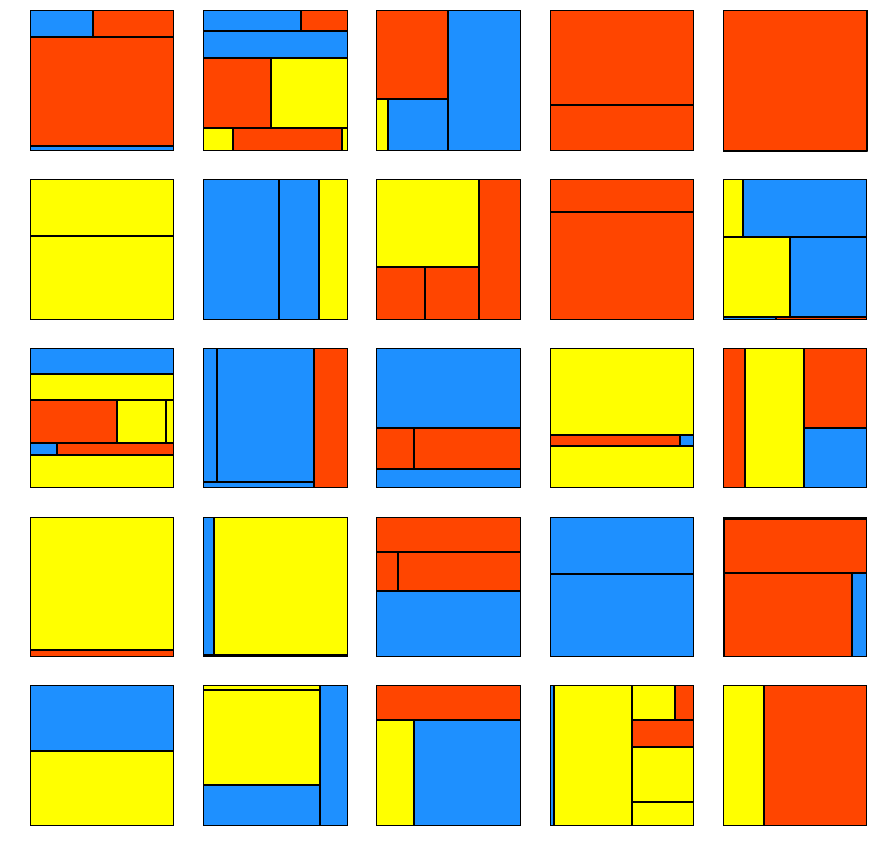

In [167]:
random_mondrians(box, 1, 5, 5)

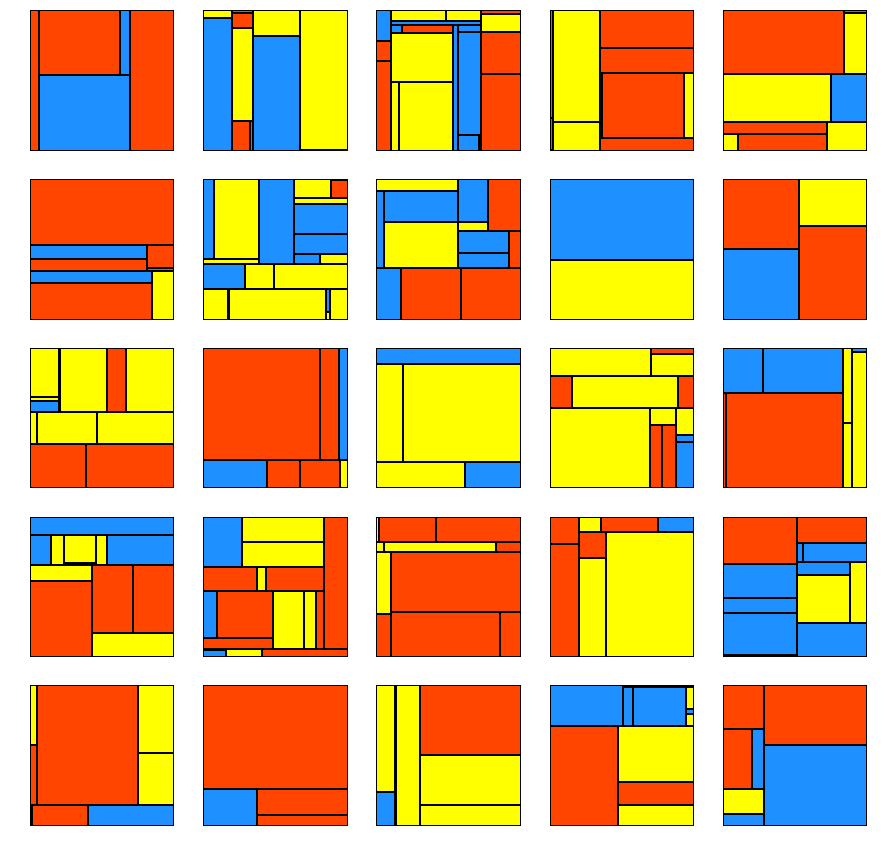

In [155]:
random_mondrians(box, 2, 5, 5)

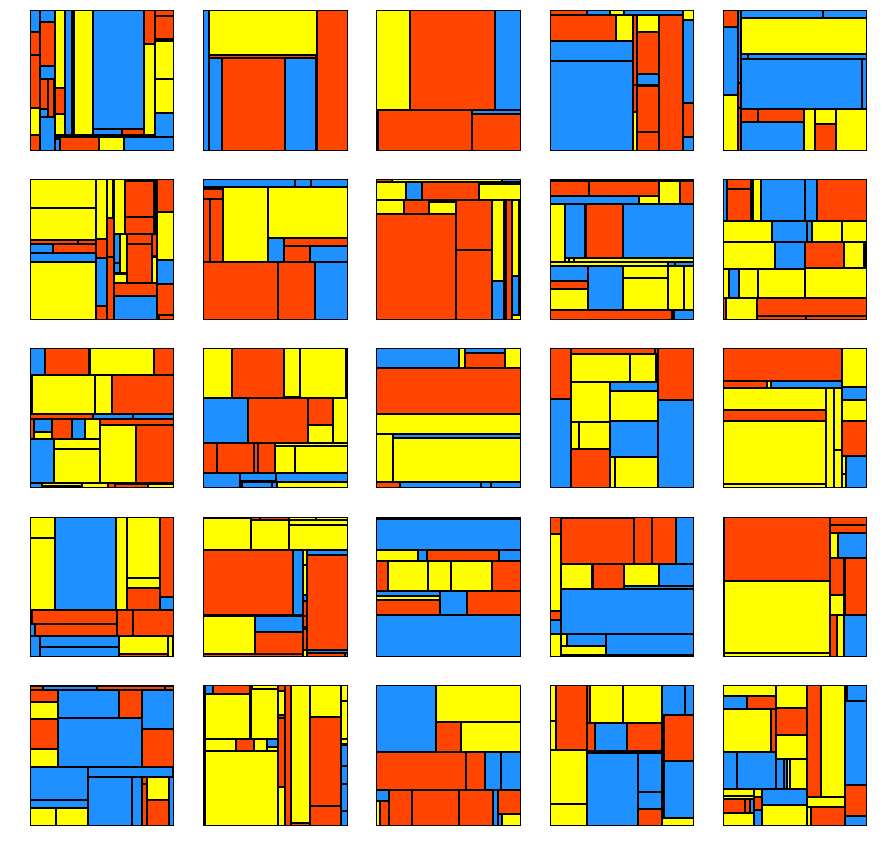

In [156]:
random_mondrians(box, 4, 5, 5)

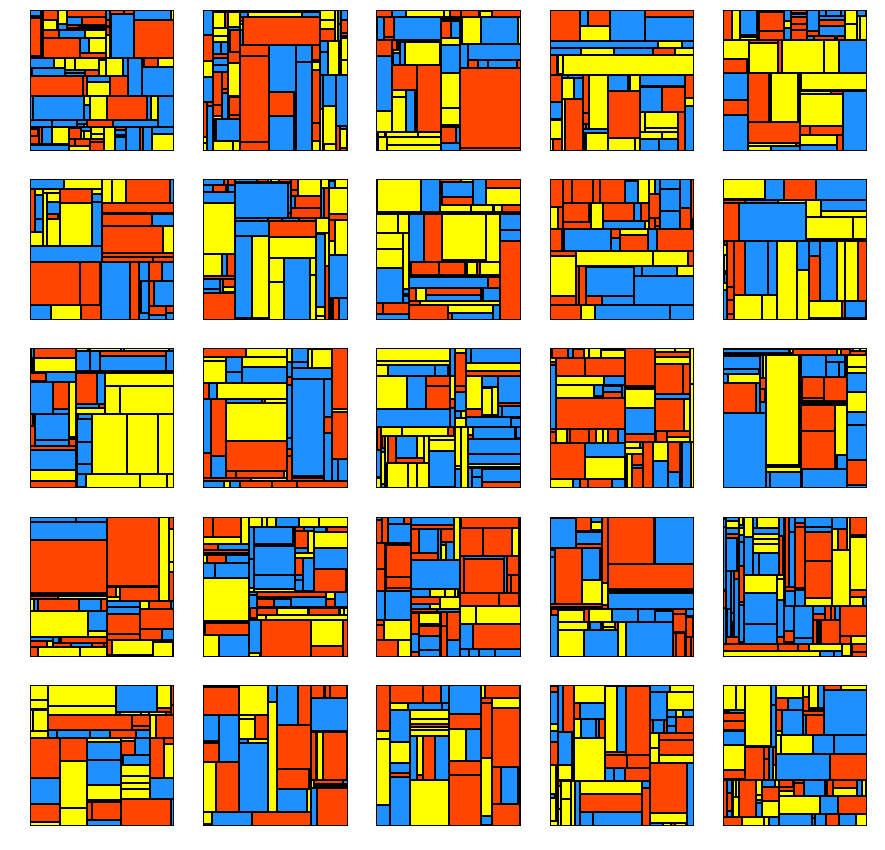

In [157]:
random_mondrians(box, 8, 5, 5)

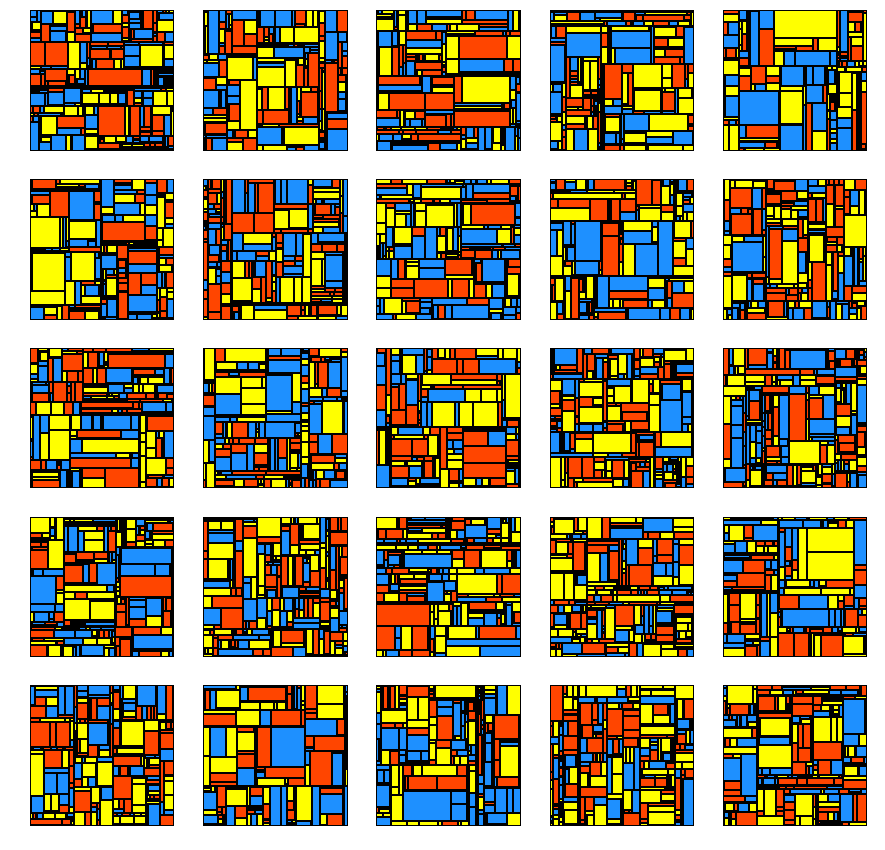

In [158]:
random_mondrians(box, 16, 5, 5)

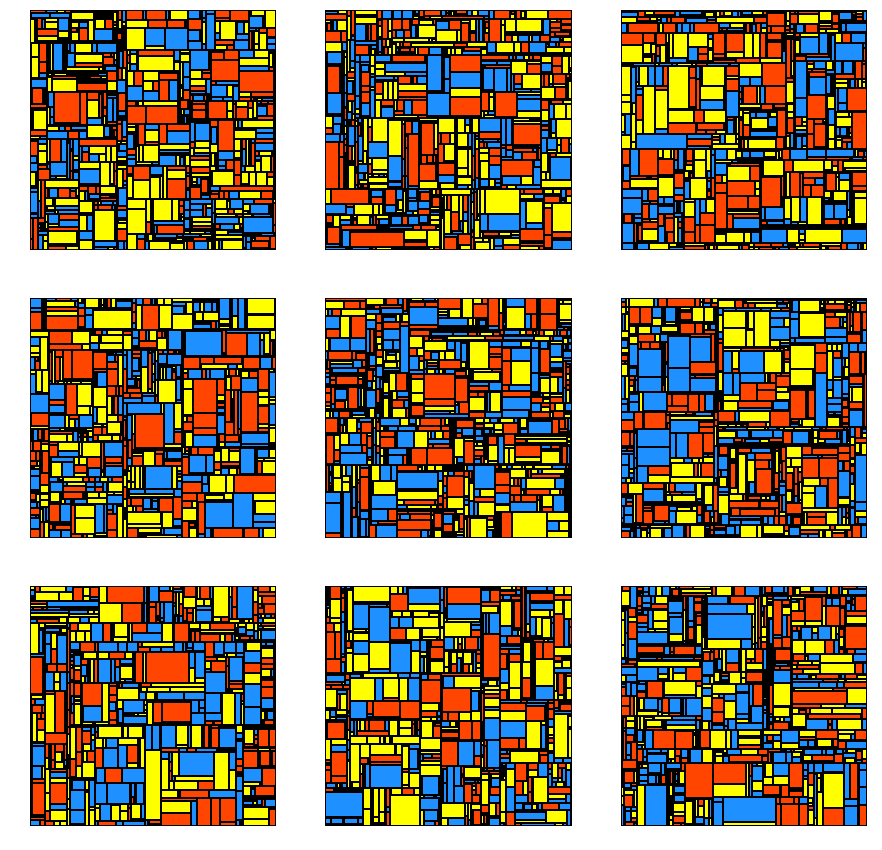

In [161]:
random_mondrians(box, 32, 3, 3)

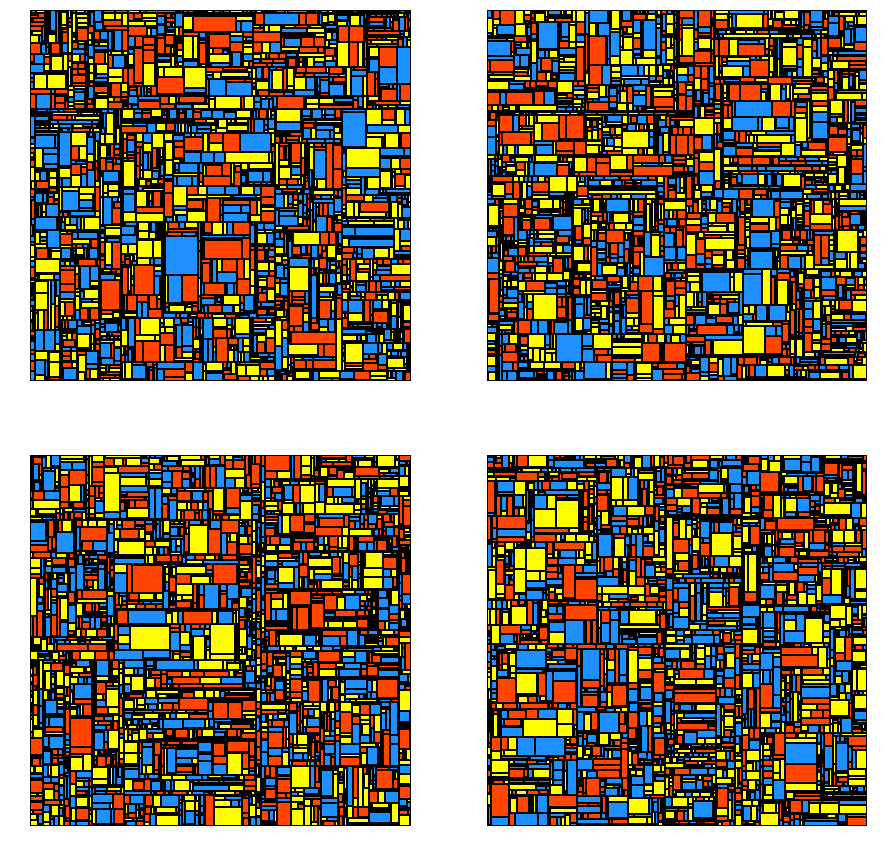

In [162]:
random_mondrians(box, 64, 2, 2)

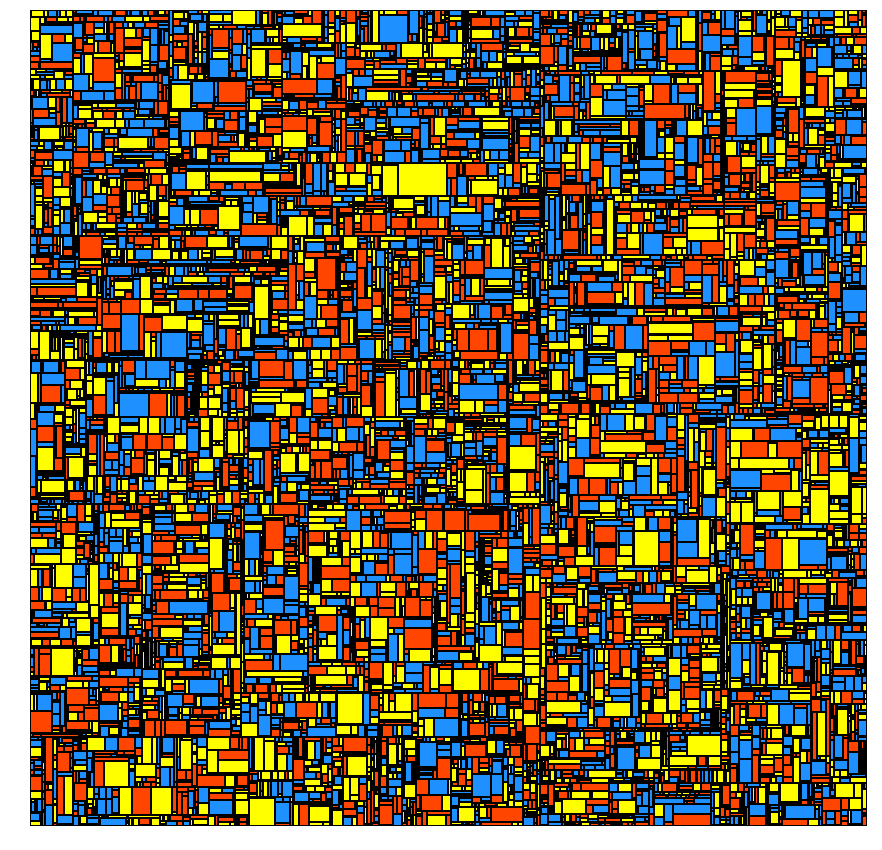

In [168]:
random_mondrians(box, 128, 1, 1)

Coming soon, Mondrian forests...